In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
import scipy.interpolate as interp
import time
from tqdm import tqdm
from IPython import display
from scipy.ndimage import gaussian_filter

In [2]:
def hardsphere(q,sigma=1):
    R = sigma/2
    P = (3*(np.sin(q*R)-q*R*np.cos(q*R))/(q*R)**3)**2
    return P

def SQ_HS(QDHS,phi):
    Alpha = (1+2*phi)**2/(1-phi)**4
    Beta = -6*phi*(1+phi/2)**2/(1-phi)**4
    Gamma = phi*Alpha/2
    G = lambda x: Alpha*(np.sin(x)-x*np.cos(x))/x**2 + Beta*(2*x*np.sin(x)+(2-x**2)*np.cos(x)-2)/x**3 + Gamma*(-x**4*np.cos(x)+4*((3*x**2-6)*np.cos(x)+(x**3-6*x)*np.sin(x)+6))/x**5
    S_HS = 1/(1+24*phi*G(2*QDHS/2)/(2*QDHS/2))
    return S_HS

In [3]:
q = (np.arange(80)+1)/80*16
phi = 0.225

S = SQ_HS(q,phi)
P = hardsphere(q)
I = S*P
I_sm = gaussian_filter(I,sigma=5)


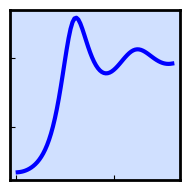

In [4]:
fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot()
ax.plot(q,S,'b',lw=3)

# ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', direction='in', labelsize=20)
[x.set_linewidth(2) for x in ax.spines.values()]
ax.set_facecolor('#D0E0FF')

plt.tight_layout()
plt.show()

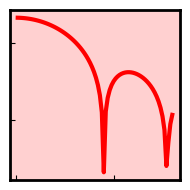

In [5]:
fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot()
ax.plot(q,P,'r',lw=3)

ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', direction='in', labelsize=20)
[x.set_linewidth(2) for x in ax.spines.values()]
ax.set_facecolor('#FFD0D0')

plt.tight_layout()
plt.show()

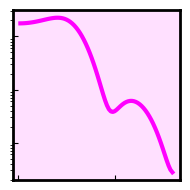

In [7]:
fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot()
ax.plot(q,I_sm,'#FF00FF',lw=3)

ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', direction='in', labelsize=20)
[x.set_linewidth(2) for x in ax.spines.values()]
ax.set_facecolor('#FFE0FF')

plt.tight_layout()
plt.show()

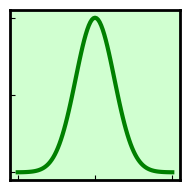

In [75]:
x = np.arange(101)/50-1
y = np.exp(-x**2*8)

fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot()
ax.plot(x,y,'g',lw=3)

# ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', direction='in', labelsize=20)
[x.set_linewidth(2) for x in ax.spines.values()]
ax.set_facecolor('#D0FFD0')

plt.tight_layout()
plt.show()

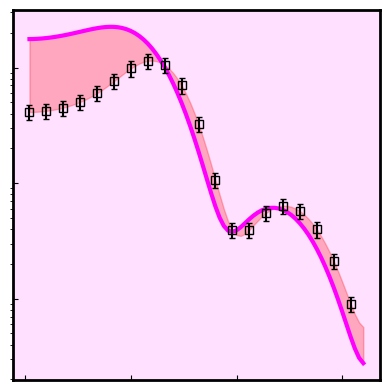

In [91]:
S_2 = SQ_HS(q*0.97,0.4)
P_2 = hardsphere(q*0.97)
I_2 = S_2*P_2
I_2_sm = gaussian_filter(I_2,sigma=5)
I_2_sm_err = I_2_sm*0.15
index_I_2 = np.arange(20)*4

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot()
ax.fill_between(q,I_sm,I_2_sm,color='r',alpha=0.25)
ax.plot(q,I_sm,'#FF00FF',lw=3)
ax.plot(q[index_I_2],I_2_sm[index_I_2],
            's', color='k', fillstyle='none', lw=1, alpha=1,
            label='ground truth')
ax.errorbar(q[index_I_2],I_2_sm[index_I_2],I_2_sm_err[index_I_2],
            alpha=1,fmt='none',color='k',capsize=2.0)

ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', direction='in', labelsize=20)
[x.set_linewidth(2) for x in ax.spines.values()]
ax.set_facecolor('#FFE0FF')

plt.tight_layout()
plt.show()

In [85]:
rr = np.linspace(0.01, 10.0, 200)
ur_hc = 4*500*((2**(1/6)/rr)**12-(2**(1/6)/rr)**6-0.25)
ur_hc[rr>=1] = 0

def sample_potential(fp,fp_err):
    n_sample = 100
    
    kappa = fp[1]
    kappa_std = fp_err[1]
    A = fp[2]
    A_std = fp_err[2]
    
    ur_sample = np.zeros((tf.size(rr),n_sample))
    for i in range(n_sample):
        kappa_sample = np.random.normal()*(kappa_std) + kappa
        A_sample = np.random.normal()*(A_std) + A
        ur_sample[:,i] = A_sample*np.exp(-(rr-1)/kappa_sample)/rr + ur_hc
        
    ur_std = np.std(ur_sample,axis=1)
    ur_mean = np.mean(ur_sample,axis=1)
        
    return ur_mean, ur_std

def sample_potential_GT(fp):
    kappa = fp[1]
    A = fp[2]
    
    ur = A*np.exp(-(rr-1)/kappa)/rr + ur_hc
        
    return ur

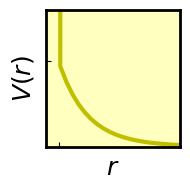

In [86]:
x = rr
y = sample_potential_GT([0.225,0.3,5])

fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot()
ax.plot(x,y,'y',lw=3)

# ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim([0.9,2])
ax.set_ylim([0,8])
ax.set_xlabel(r'$r$',fontsize=18)
ax.set_ylabel(r'$V(r)$',fontsize=18)
ax.tick_params(axis='both', which='major', direction='in', labelsize=20)
[x.set_linewidth(2) for x in ax.spines.values()]
ax.set_facecolor('#FFFFC0')

plt.tight_layout()
plt.show()

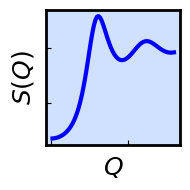

In [87]:
fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot()
ax.plot(q,S,'b',lw=3)

# ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel(r'$Q$',fontsize=18)
ax.set_ylabel(r'$S(Q)$',fontsize=18)

ax.tick_params(axis='both', which='major', direction='in', labelsize=20)
[x.set_linewidth(2) for x in ax.spines.values()]
ax.set_facecolor('#D0E0FF')

plt.tight_layout()
plt.show()

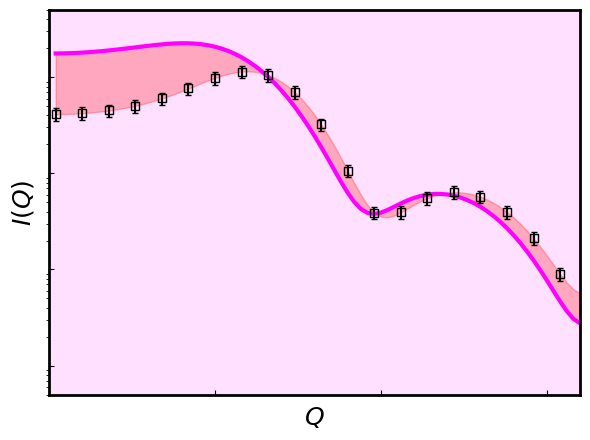

In [90]:
S_2 = SQ_HS(q*0.97,0.4)
P_2 = hardsphere(q*0.97)
I_2 = S_2*P_2
I_2_sm = gaussian_filter(I_2,sigma=5)
I_2_sm_err = I_2_sm*0.15
index_I_2 = np.arange(20)*4

fig = plt.figure(figsize=(6,4.5))
ax = fig.add_subplot()
ax.fill_between(q,I_sm,I_2_sm,color='r',alpha=0.25)
ax.plot(q,I_sm,'#FF00FF',lw=3)
ax.plot(q[index_I_2],I_2_sm[index_I_2],
            's', color='k', fillstyle='none', lw=1, alpha=1,
            label='ground truth')
ax.errorbar(q[index_I_2],I_2_sm[index_I_2],I_2_sm_err[index_I_2],
            alpha=1,fmt='none',color='k',capsize=2.0)

ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim([0,16])
ax.set_ylim([0.00005,0.5])

ax.set_xlabel(r'$Q$',fontsize=18)
ax.set_ylabel(r'$I(Q)$',fontsize=18)

ax.tick_params(axis='both', which='major', direction='in', labelsize=20)
[x.set_linewidth(2) for x in ax.spines.values()]
ax.set_facecolor('#FFE0FF')

plt.tight_layout()
plt.show()